<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/EjercicioSimu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 5**
Considere el modelo de Vasicek $dx_t=c(x_t-μ)d_t+σdw_t$ con $μ=10,c=-0.4,σ=0.03 \ y \ x_0=10$. Usando el método de Euler-Murayama, estime $P(Y_5>10.8)$.


**Solución**

Valor promedio de las simulaciones: 9.999980112834743
Probabilidad estimada de que Y_T > 10.08: 0.00065


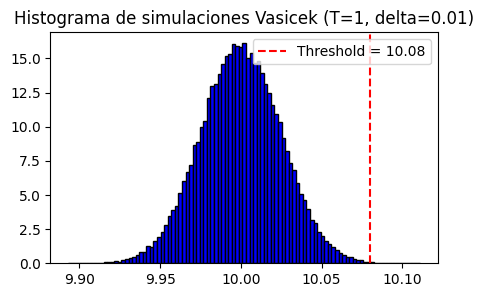

In [17]:
from math import sqrt
from random import gauss
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
from statistics import mean

@jit(nopython=True)
def euler_vasicek(x0, c, u, o, delta, ns, T):
    # Crear un array para almacenar los valores finales de las simulaciones
    l = np.zeros(ns)
    oo = sqrt(delta)  # Factor para el término Browniano
    for i in range(ns):
        x = x0  # Valor inicial para cada simulación
        t = 0  # Tiempo inicial
        while t < T:
            # Aplicar el método de Euler-Maruyama
            x = x + c * (x - u) * delta + o * oo * np.random.normal(0, 1)
            t = t + delta
        # Almacenar el valor final en l
        l[i] = x
    return l

# Parámetros del modelo de Vasicek
c0 = -.4  # Velocidad de reversión
u0 = 10   # Valor medio al que revertir
o0 = 0.03  # Volatilidad
x00 = 10   # Valor inicial (tasa de interés inicial)
delta = 0.01  # Tamaño del paso temporal
ns = 100000  # Número de simulaciones (ajusté a 100,000 para tiempos razonables)
T = 1  # Tiempo total de la simulación (un año)
threshold = 10.08  # Valor umbral para estimar la probabilidad

# Realizar la simulación
l = euler_vasicek(x00, c0, u0, o0, delta, ns, T)

# Estimar la probabilidad de que Y_T > 10.08
prob = np.mean(l > threshold)

# Imprimir el promedio de las simulaciones y la probabilidad
print(f"Valor promedio de las simulaciones: {mean(l)}")
print(f"Probabilidad estimada de que Y_T > {threshold}: {prob}")

# Visualización de resultados
x2 = np.max(l)
x1 = np.min(l)
b = np.linspace(x1, x2, 100)  # Crear 100 bins entre el valor mínimo y máximo

# Dibujar el histograma de los resultados de la simulación
plt.figure(figsize=(5, 3))
plt.hist(l, density=True, bins=b, color='blue', edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title(f'Histograma de simulaciones Vasicek (T={T}, delta={delta})')
plt.legend()
plt.show()
